In [1]:
cd ..

/home/xingchenw/bo-on-graph


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import pandas as pd


/home/xingchenw/anaconda3/envs/bo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:

from copy import deepcopy
def plot_result(path: str, label: str, plot_kwargs: dict = None, median=False, cumulative=False, regret=True):
    plot_kwargs = deepcopy(plot_kwargs) or {}
    data_path_seeds = [f for f in os.listdir(path) if ".pt" in f]
    data_over_seeds = []
    for i, df in enumerate(data_path_seeds):
        data_path = os.path.join(path, df)
        with open(data_path, "rb") as fp:
            data = torch.load(data_path, map_location="cpu")
            minimize = False
        if "regret" in data.keys() and regret:
            y = -data["regret"].numpy().flatten()   # to maximize negative regret
            minimize = True
        else:
            assert "Y" in data.keys()
            y = data["Y"].numpy().flatten()
        data_over_seeds.append(y)
    n_data_per_trial = np.array([len(d) for d in data_over_seeds])
    if len(np.unique(n_data_per_trial)) > 1:
        # pad as appropriate
        max_len = max(n_data_per_trial)
        for i, d in enumerate(data_over_seeds):
            data_over_seeds[i] = np.concatenate((
                d, d[-1] * np.ones(max_len - d.shape[0])))
    all_data = np.array(data_over_seeds)
    if cumulative:
        y = pd.DataFrame(all_data).cummax(axis=1)
    else:
        y = pd.DataFrame(all_data)
    x = np.arange(all_data.shape[1])
    if median:
        mean = y.median(axis=0)
        lb = y.quantile(q=0.25, axis=0)
        ub = y.quantile(q=0.75, axis=0)
    else:
        mean = y.mean(axis=0)
        # standard error
        lb = mean - y.std(axis=0) / np.sqrt(all_data.shape[0])
        ub = mean + y.std(axis=0) / np.sqrt(all_data.shape[0])
    if minimize:
        mean = -mean
        lb = -lb
        ub = -ub
    plt.plot(x, mean, ".-", label=label, **plot_kwargs)
    if "alpha" in plot_kwargs.keys():
        del plot_kwargs["alpha"]
    if "markevery" in plot_kwargs.keys():
        del plot_kwargs["markevery"]
    plt.fill_between(x, lb, ub, alpha=0.1, **plot_kwargs)
    return y

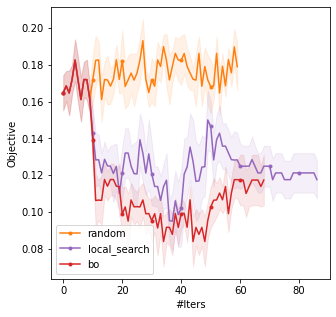

Text(0, 0.5, 'Objective')

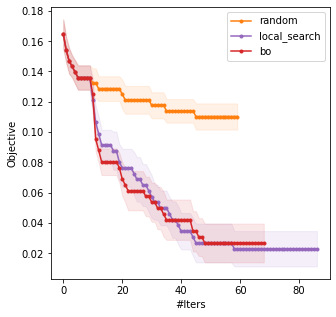

In [11]:
data_keys = {
    "random": {"path": "logs/synthetic/random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": "logs/synthetic/local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": "logs/synthetic/ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}
plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=False)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
# plt.yscale("log")
plt.show()

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
# plt.yscale("log")

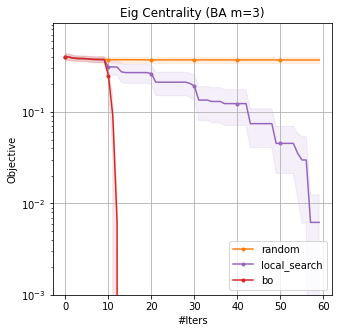

In [98]:
root_dir = "logs/eigen_centrality/ba_3"
data_keys = {
    "random": {"path": f"{root_dir}/random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": f"{root_dir}/local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": f"{root_dir}/ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
plt.yscale("log")
plt.title("Eig Centrality (BA m=3)")
plt.ylim([1e-3, None])
plt.grid()

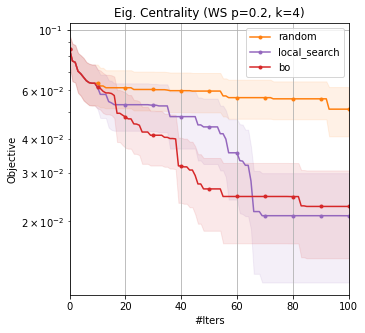

In [102]:
root_dir = "logs/eigen_centrality/ws_4_0.2/"
data_keys = {
    "random": {"path": f"{root_dir}/random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": f"{root_dir}/local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": f"{root_dir}/ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True, regret=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")

plt.yscale("log")
# plt.ylim([1e-3, None])
plt.xlim([0, 100])
plt.title("Eig. Centrality (WS p=0.2, k=4)")
plt.grid()

(0.0, 100.0)

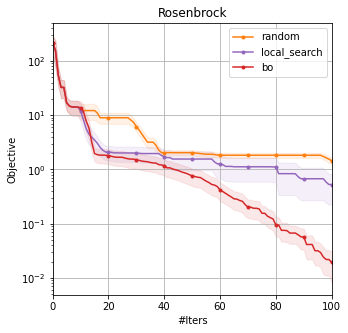

In [93]:
root_dir = "logs/rosenbrock/grid/"
data_keys = {
    "random": {"path": f"{root_dir}/random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": f"{root_dir}/local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": f"{root_dir}/ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True, regret=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
plt.title("Rosenbrock")
plt.yscale("log")
# plt.ylim([1e-3, None])
plt.grid()
plt.xlim([0, 100])

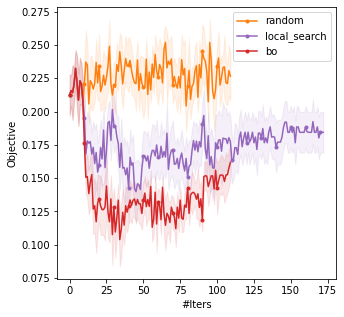

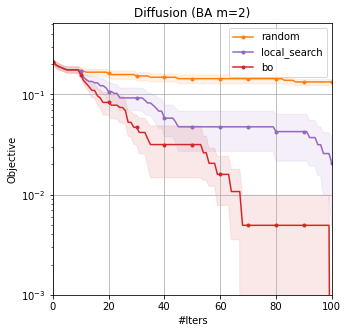

In [95]:
data_keys = {
    "random": {"path": "logs/diffusion2/random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": "logs/diffusion2/local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": "logs/diffusion2/ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}
plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=False)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
# plt.yscale("log")
plt.show()

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
plt.yscale("log")
plt.ylim([1e-3, None])
plt.title("Diffusion (BA m=2)")
plt.xlim([0, 100])
plt.grid()

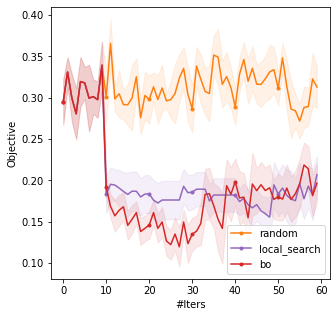

Text(0, 0.5, 'Objective')

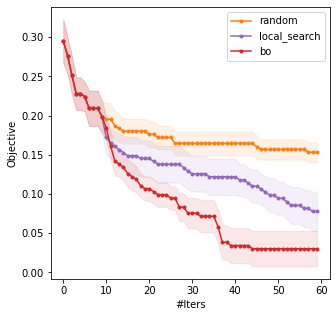

In [13]:
data_keys = {
    "random": {"path": "logs/diffusion/random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": "logs/diffusion/local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": "logs/diffusion/ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}
plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=False)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
# plt.yscale("log")
plt.show()

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
# plt.yscale("log")

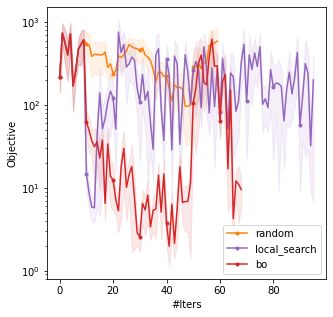

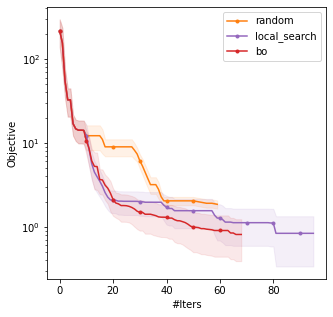

In [79]:
data_keys = {
    "random": {"path": "logs/test_function//random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": "logs/test_function//local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": "logs/test_function//ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}
plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=False)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
plt.yscale("log")
plt.show()

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
plt.yscale("log")
# plt.ylim([1e-4, None])

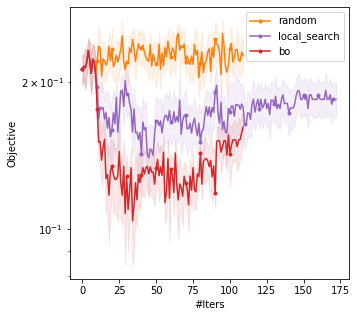

(0.0, 100.0)

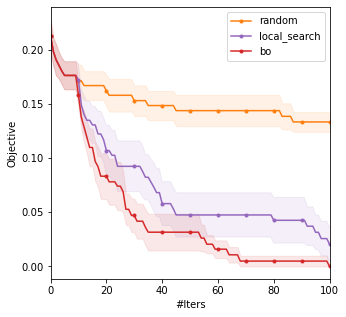

In [103]:
data_keys = {
    "random": {"path": "logs/diffusion2//random", "plot_kwargs": {"color": "C1", "markevery": 10}},
    "local_search":  {"path": "logs/diffusion2//local_search", "plot_kwargs": {"color": "C4", "markevery": 10}},
    "bo":{"path": "logs/diffusion2//ei_ego_network_1", "plot_kwargs": {"color": "C3", "markevery": 10}},
    # "bo_global":{"path": "logs/synthetic/ei", "plot_kwargs": {"color": "C5", "markevery": 10}},
}
plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=False)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
plt.yscale("log")
plt.show()

plt.figure(figsize=[5, 5])
for label, key in data_keys.items():
    y = plot_result(key["path"], label, key["plot_kwargs"], median=False, cumulative=True)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
# plt.yscale("log")
# plt.ylim([1e-4, None])
plt.xlim([0, 100])